In [34]:
import numpy as np
import pandas as pd
import optuna
import logging
import sys
import seaborn as sns

pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 2000)

In [21]:
study_name = "SOL/USDT:USDT-&-primary_enter_long" 
storage_name = "sqlite:///../../LitmusOptuna.sqlite"

In [23]:
study = optuna.load_study(study_name=study_name, storage=storage_name)

In [26]:
study.best_trial

FrozenTrial(number=18, state=TrialState.COMPLETE, values=[-0.5074770805176342], datetime_start=datetime.datetime(2023, 4, 14, 9, 56, 34, 946419), datetime_complete=datetime.datetime(2023, 4, 14, 9, 56, 34, 946419), params={'bootstrap_type': 'Bayesian', 'colsample_bylevel': 0.04383611811484356, 'depth': 5, 'grow_policy': 'SymmetricTree', 'iterations': 1311, 'l2_leaf_reg': 1.3548754954113518e-08, 'learning_rate': 0.0028785931257941056, 'od_type': 'Iter', 'od_wait': 35, 'random_strength': 0.00016894003816983117}, user_attrs={'mean_fit_time': 1.0259846846262615, 'mean_score_time': 0.002696990966796875, 'mean_test_score': -0.5074770805176342, 'split0_test_score': -0.5707893112477828, 'split1_test_score': -0.48519582331693684, 'split2_test_score': -0.4664461069881831, 'std_fit_time': 0.00464271593401254, 'std_score_time': 0.00011396158686506716, 'std_test_score': 0.04541818200987248}, system_attrs={}, intermediate_values={}, distributions={'bootstrap_type': CategoricalDistribution(choices=('

In [30]:
df = study.trials_dataframe()
df

,number,value,datetime_start,datetime_complete,duration,params_bootstrap_type,params_colsample_bylevel,params_depth,params_grow_policy,params_iterations,params_l2_leaf_reg,params_learning_rate,params_od_type,params_od_wait,params_random_strength,user_attrs_mean_fit_time,user_attrs_mean_score_time,user_attrs_mean_test_score,user_attrs_split0_test_score,user_attrs_split1_test_score,user_attrs_split2_test_score,user_attrs_std_fit_time,user_attrs_std_score_time,user_attrs_std_test_score,state
0,0,-0.617311,2023-04-14 09:56:34.945993,2023-04-14 09:56:34.945993,0 days,Bayesian,0.040753,8,SymmetricTree,892,2.411256e-06,0.007286,Iter,26,2.044973e-01,1.449677,0.003807,-0.617311,-0.783129,-0.536439,-0.532364,0.024617,0.000996,0.117263,COMPLETE
1,1,-0.510802,2023-04-14 09:56:34.946032,2023-04-14 09:56:34.946032,0 days,Bayesian,0.041409,9,SymmetricTree,901,1.919141e-06,0.001388,Iter,19,5.371917e-04,2.061995,0.003047,-0.510802,-0.581837,-0.481918,-0.468651,0.038635,0.000164,0.050520,COMPLETE
2,2,-0.512526,2023-04-14 09:56:34.946057,2023-04-14 09:56:34.946057,0 days,Bayesian,0.042018,9,SymmetricTree,911,1.004795e-06,0.001006,Iter,18,3.754162e-04,2.132136,0.003117,-0.512526,-0.570086,-0.490455,-0.477038,0.007371,0.000134,0.041068,COMPLETE
3,3,-0.539103,2023-04-14 09:56:34.946080,2023-04-14 09:56:34.946080,0 days,Bayesian,0.035511,9,SymmetricTree,852,1.075059e-07,0.003235,Iter,16,8.802070e-04,1.664270,0.003025,-0.539103,-0.644112,-0.483371,-0.489826,0.019157,0.000100,0.074299,COMPLETE
4,4,-0.515725,2023-04-14 09:56:34.946103,2023-04-14 09:56:34.946103,0 days,Bayesian,0.048244,10,SymmetricTree,963,8.844510e-06,0.001317,Iter,24,4.192038e-04,2.541028,0.003377,-0.515725,-0.604974,-0.476544,-0.465659,0.039315,0.000178,0.063264,COMPLETE
5,5,-0.510482,2023-04-14 09:56:34.946125,2023-04-14 09:56:34.946125,0 days,Bayesian,0.042853,8,SymmetricTree,878,3.834769e-07,0.001303,Iter,29,9.905479e-03,1.491338,0.003379,-0.510482,-0.569618,-0.486666,-0.475163,0.011254,0.000760,0.042078,COMPLETE
6,6,-0.508598,2023-04-14 09:56:34.946147,2023-04-14 09:56:34.946147,0 days,Bayesian,0.049859,8,SymmetricTree,869,3.553985e-08,0.001360,Iter,29,9.220456e-03,1.690687,0.002924,-0.508598,-0.575692,-0.477314,-0.472789,0.009926,0.000060,0.047478,COMPLETE
7,7,-0.599495,2023-04-14 09:56:34.946169,2023-04-14 09:56:34.946169,0 days,Bayesian,0.051997,8,SymmetricTree,1017,2.168300e-08,0.004404,Iter,29,1.030920e-02,2.037868,0.003190,-0.599495,-0.729008,-0.523317,-0.546161,0.005683,0.000250,0.092053,COMPLETE
8,8,-0.510791,2023-04-14 09:56:34.946194,2023-04-14 09:56:34.946194,0 days,Bayesian,0.067085,7,SymmetricTree,835,4.110287e-08,0.001306,Iter,33,2.037945e-02,1.417360,0.002870,-0.510791,-0.567886,-0.486310,-0.478177,0.011787,0.000074,0.040509,COMPLETE
9,9,-0.518150,2023-04-14 09:56:34.946217,2023-04-14 09:56:34.946217,0 days,Bernoulli,0.046805,8,Lossguide,876,2.131794e-07,0.003519,Iter,25,5.686019e-03,2.674570,0.005214,-0.518150,-0.606414,-0.482557,-0.465481,0.005247,0.000014,0.062800,COMPLETE


In [32]:
df[["user_attrs_std_test_score", "user_attrs_mean_test_score"]]

,user_attrs_std_test_score,user_attrs_mean_test_score
0,0.117263,-0.617311
1,0.050520,-0.510802
2,0.041068,-0.512526
3,0.074299,-0.539103
4,0.063264,-0.515725
5,0.042078,-0.510482
6,0.047478,-0.508598
7,0.092053,-0.599495
8,0.040509,-0.510791
9,0.062800,-0.518150


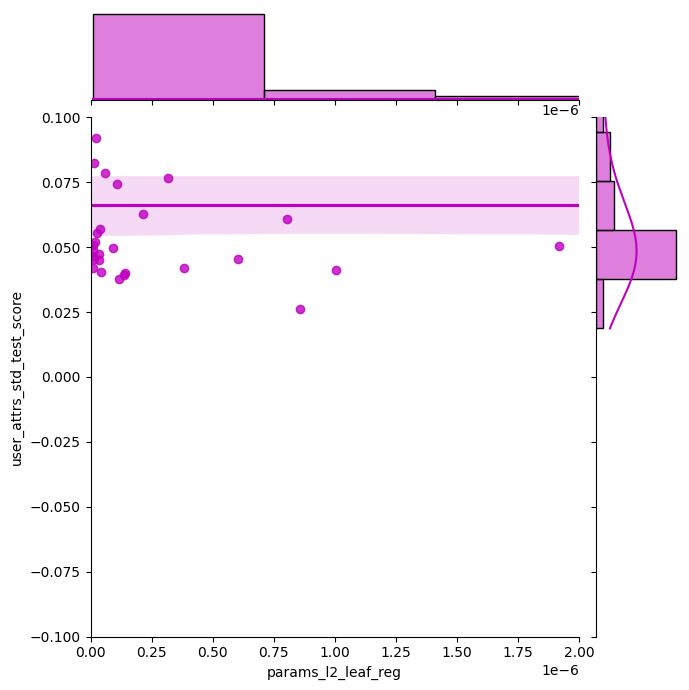

In [49]:
g = sns.jointplot(x="params_l2_leaf_reg", y="user_attrs_std_test_score", data=df,
                  kind="reg", truncate=False,
                  xlim=(0, 0.000002), ylim=(-0.1, 0.1),
                  color="m", height=7)